In [1]:
# Import necessary libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.plot_src import plot_duplicates, plotter, plot_missing_values, plot_wordcloud, plot_distribution
from src.handling_duplicates import drop_duplicates, duplicate_handler
from src.handling_missing_values import missing_values_handler, drop_missing_values
from src.save_dataset import dataset_saver, save_csv

In [2]:
#loading the dataset
df = pd.read_csv('D:/Project-Fake_news_classifier/data/raw/WELFake_Dataset.csv')
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
#removing the index column: Unnamed: 0 and title column as focusing on the text

df = df.drop(columns=['Unnamed: 0','title'])

df.head()

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
#basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    72095 non-null  object
 1   label   72134 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


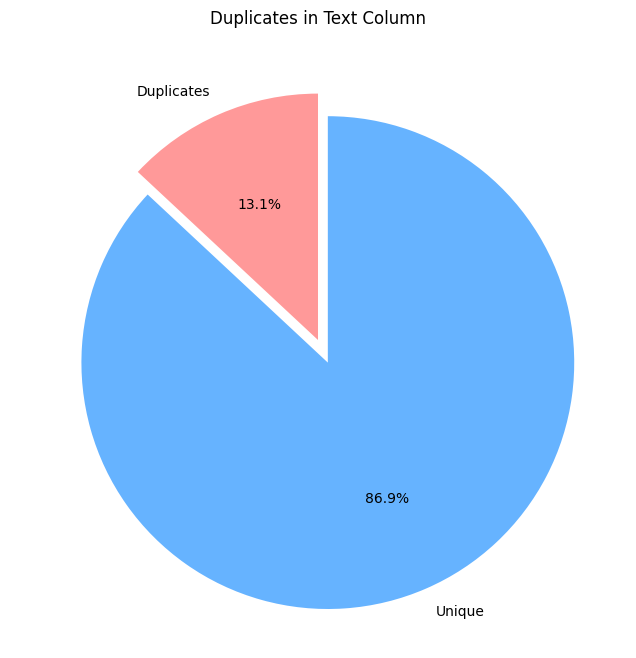

In [5]:
#plotting the duplicates in the dataset
duplicate_plotter = plotter(plot_duplicates)
duplicate_plotter.apply_plotter(df)

In [6]:
#dropping the duplicates of text

textDuplicate_handler = duplicate_handler(drop_duplicates)
df = textDuplicate_handler.apply_handler(df)

# print the shape
print('The shape of the dataframe is reduced to',df.shape)

The shape of the dataframe is reduced to (62719, 2)


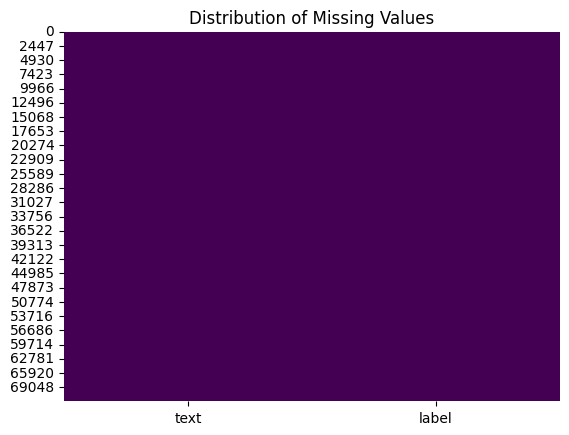

In [7]:
#Plotting the distribution of missing values

missing_plotter = plotter(plot_missing_values)
missing_plotter.apply_plotter(df)

In [8]:
#removing the values of the text as only 39 rows are null
missing_value_handler = missing_values_handler(drop_missing_values)
df = missing_value_handler.apply_handler(df)
print(df.isnull().sum())

text     0
label    0
dtype: int64


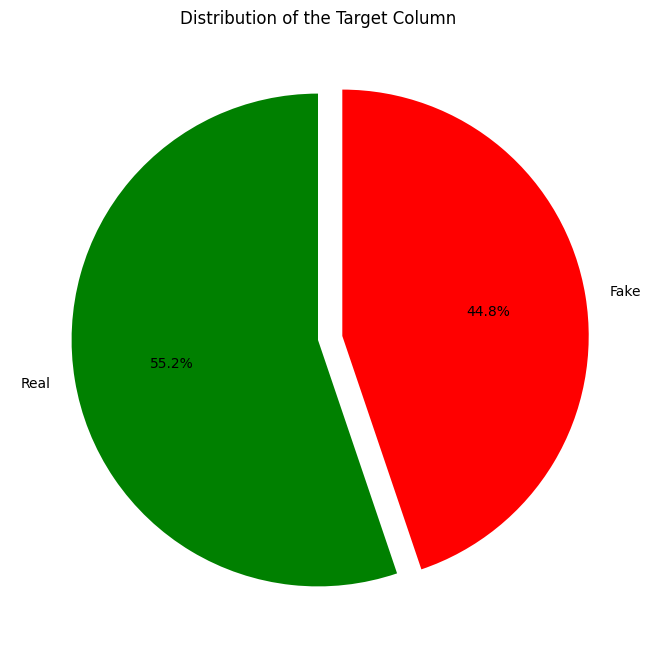

In [9]:
# plotting the distribution of the target variable

distribution_plotter = plotter(plot_distribution('label'))
distribution_plotter.apply_plotter(df)

In [ ]:
#plotting the wordcloud

wordcloud_plotter = plotter(plot_wordcloud)
wordcloud_plotter.apply_plotter(df)

In [10]:

#saving the dataset
save_to_csv = dataset_saver(save_csv)
save_to_csv.apply_saver(df,'D:/Project-Fake_news_classifier/processed_data/fake_news_eda.csv')